# Данные

Загрузим и предобработаем данные. Я обработал их следующим образом:
* Прочитал две таблицы (Trading_session и Chart_data)
* Склеил их по id и session_id соответственно
* Оставил только информацию про месячные торги
* Отсортировал по времени
* Сгруппировал по дню или session_id

In [1]:
from data_proc import prepare_data


session_serieses = prepare_data("data/trade_info.sqlite3", key="session_id")
date_serieses = prepare_data("data/trade_info.sqlite3", key="date")

# Визуализация

## Весь период

Построим несколько графиков для всей последовательности.

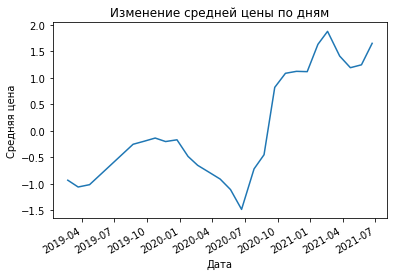

In [3]:
from visualizations import show_entire_period_price


show_entire_period_price(date_serieses)

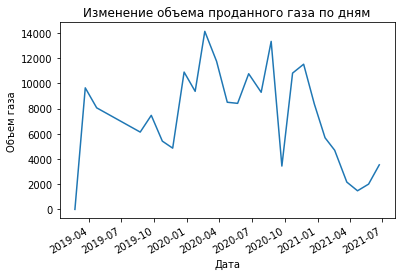

In [4]:
from visualizations import show_entire_period_lot_size


show_entire_period_lot_size(date_serieses)

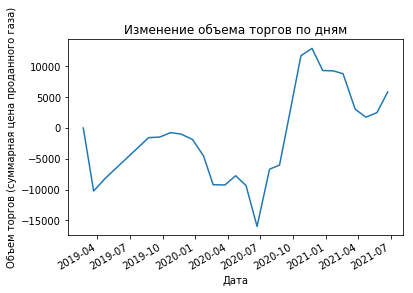

In [5]:
from visualizations import show_entire_period_money


show_entire_period_money(date_serieses)

Можно заметить, что объем торгов коррелирует со средней ценой, а вот график объема проданного газа не показывает какого-то явного тренда.

## Сессии

Далее посмотрим на сессии. Для этого построим поминутные графики цены для каждой сесси. Я делал это так:
* Изначальная цена равна средневзевешанной цене предыдущей сесси
* Далее, если в определенную минуту произошли какие-то сделки, текущая цена обновляетсяя
* Если сделок не произошло, цена остается неизменной

Получим поминутные значения.

In [6]:
import numpy as np


charts = [s.get_price_chart() for s in session_serieses]
charts = np.stack(charts)

### Одна сессия

Визаулизируем какую-нибудь сессию просто чтоы пониматЬ, как она выглядит

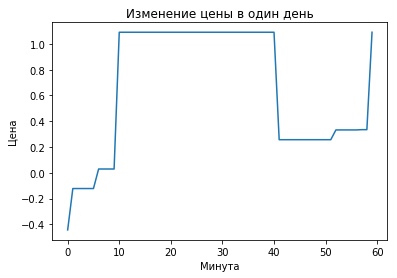

In [7]:
from visualizations import show_series_price


show_series_price(charts[30])

### Ненормализованные сессии

Далее попробуем визуализировать распределение сессий. Я воспользовался алгоритмом TSNE. Для разных метрик я вывел двумерные проекции и отдельно построил графики ближайших и наиболее отдаленных сессий.

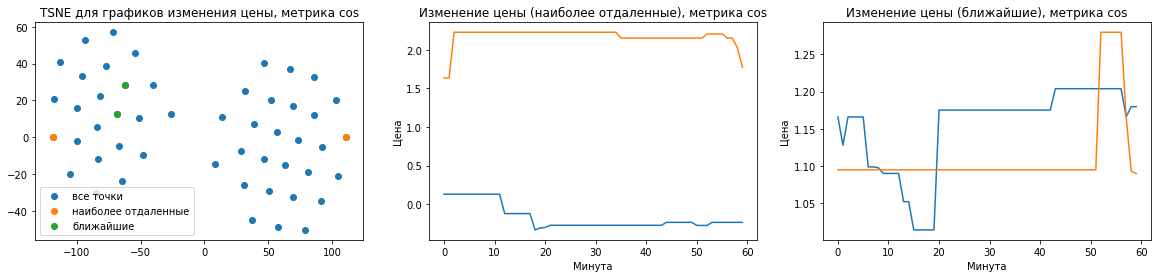

In [17]:
from visualizations import show_tsne


show_tsne(charts, metric_name="cos")

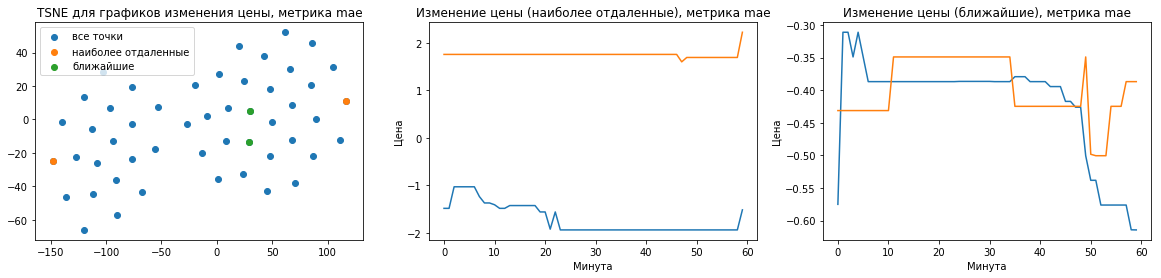

In [22]:
from visualizations import show_tsne


show_tsne(charts, metric_name="mae")

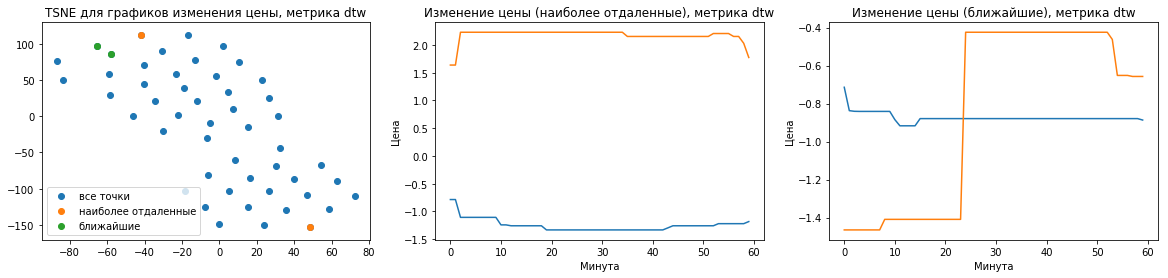

In [31]:
from visualizations import show_tsne


show_tsne(charts, metric_name="dtw")

Здесь видно, что вне зависимости от метрики распределения выглядят довольно похожим образом. При этом, если посмотреть на ближайшие и наиболее отдаленные сессии, можно заметить, что ближайшие не очень-то и похожи друг на друга, а наиболее отдаленные на демонстрируют разные паттерны поведения.

Можно попробовать отнормировать данные.

### Нормированные сессии

In [11]:
mean = charts.mean(axis=1)[:, None]
std = charts.std(axis=1)[:, None]
norm_charts = (charts - mean) / std

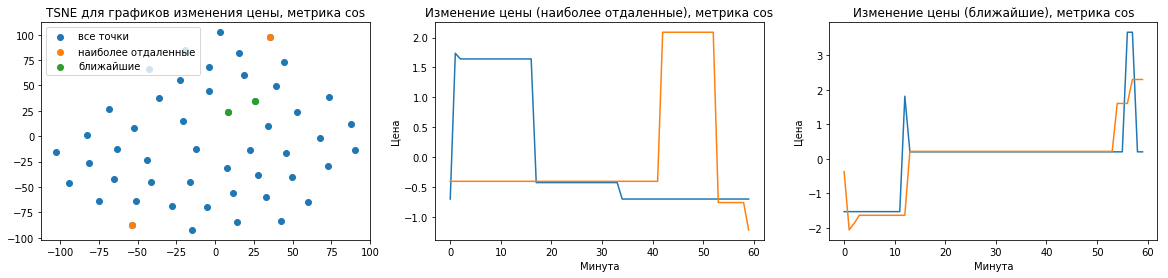

In [37]:
from visualizations import show_tsne


show_tsne(norm_charts, metric_name="cos")

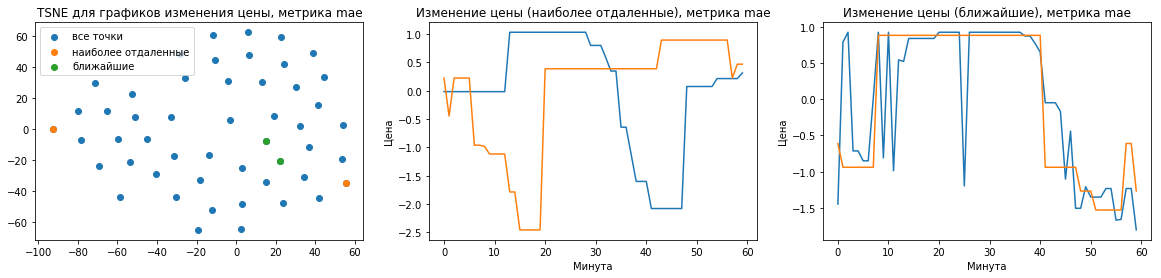

In [38]:
from visualizations import show_tsne


show_tsne(norm_charts, metric_name="mae")

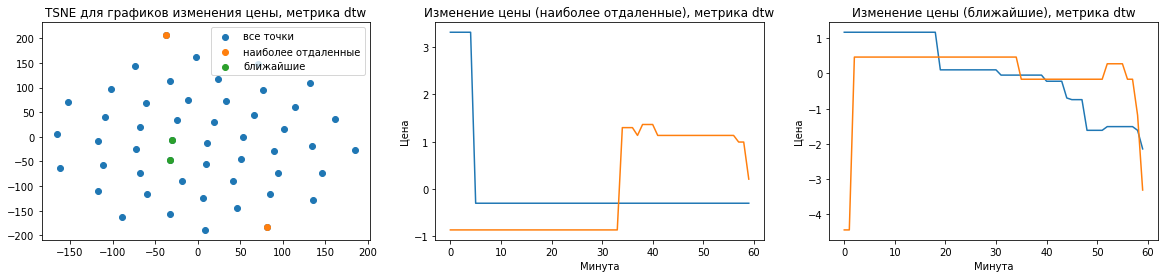

In [39]:
from visualizations import show_tsne


show_tsne(norm_charts, metric_name="dtw")

Здесь уже можно заметить, что ближайшие сессии действительно похожи друг на друга, а наиболее отдаленные демонстрируют разные паттерны поведения. При этом в самих распределениях (особенно в последним) не выделяется четких структур.